In [46]:
import pandas as pd
import numpy as np
import time
import datetime as dt
import dateutil.parser

In [25]:
#  read raw data (downloaded from http://web.mta.info/developers/turnstile.html) to dataframe 
df_august_3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190803.txt')
df_august_10 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190810.txt")
df_august_17 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190817.txt")



In [ ]:
# combine individual dataframes into a single merged dataframes
df_MTA = pd.concat([df_august_3, df_august_10, df_august_17])
df_MTA.columns = df_MTA.columns.str.strip()

In [26]:
df_MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
#remove white space in column names
df_MTA.columns = [column.strip() for column in df_MTA.columns]

In [7]:
df_MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
df_MTA.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,REGULAR,7148326,2418975
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,12:00:00,REGULAR,7148441,2419042
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,16:00:00,REGULAR,7148647,2419101
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,20:00:00,REGULAR,7148908,2419145
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,00:00:00,REGULAR,7149087,2419165
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,04:00:00,REGULAR,7149111,2419171
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,08:00:00,REGULAR,7149126,2419198
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,12:00:00,REGULAR,7149198,2419241


In [9]:
#check datatype
df_MTA['DATE'].dtypes

dtype('O')

In [10]:
#check that everyday is represented, and how many times
df_MTA.DATE.value_counts().sort_index()

07/27/2019    29422
07/28/2019    29250
07/29/2019    29657
07/30/2019    30210
07/31/2019    29524
08/01/2019    29842
08/02/2019    29091
08/03/2019    29136
08/04/2019    29198
08/05/2019    29251
08/06/2019    29293
08/07/2019    29959
08/08/2019    29734
08/09/2019    29304
08/10/2019    29233
08/11/2019    29258
08/12/2019    29283
08/13/2019    30830
08/14/2019    30115
08/15/2019    29628
08/16/2019    30219
Name: DATE, dtype: int64

In [44]:
#turn dates and times into time series datetimes

df_MTA['DATE_TIME'] = pd.to_datetime(df_MTA['DATE'] + ' ' + df_MTA['TIME'], format="%m/%d/%Y %H:%M:%S")
df_MTA['Day'] = df_MTA["DATE_TIME"].dt.day_name()

In [45]:
df_MTA.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935,2019-07-27 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939,2019-07-27 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,REGULAR,7148326,2418975,2019-07-27 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,12:00:00,REGULAR,7148441,2419042,2019-07-27 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,16:00:00,REGULAR,7148647,2419101,2019-07-27 16:00:00,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,20:00:00,REGULAR,7148908,2419145,2019-07-27 20:00:00,Saturday
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,00:00:00,REGULAR,7149087,2419165,2019-07-28 00:00:00,Sunday
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,04:00:00,REGULAR,7149111,2419171,2019-07-28 04:00:00,Sunday
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,08:00:00,REGULAR,7149126,2419198,2019-07-28 08:00:00,Sunday
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/28/2019,12:00:00,REGULAR,7149198,2419241,2019-07-28 12:00:00,Sunday


In [79]:
#3
#check to see if there are duplicates at same turnstile at same time
#SCP is subunit of station, unit and CA, so all four need ot be grouped
#to get to get entries and exits for each turnstile
(df_MTA
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])  
 .ENTRIES.count()
 .reset_index()  # or use as_index = False; otherwise makes groupby columns new index 
 .sort_values("ENTRIES", ascending=False)).head(15)
df_MTA["DESC"].value_counts()

0         REGULAR
1         REGULAR
2         REGULAR
3         REGULAR
4         REGULAR
           ...   
208561    REGULAR
208562    REGULAR
208563    REGULAR
208564    REGULAR
208565    REGULAR
Name: DESC, Length: 621437, dtype: object

In [80]:
df_MTA["DESC"].value_counts()

REGULAR       618269
RECOVR AUD      3168
Name: DESC, dtype: int64

In [14]:
#check desc for why there are duplicate entries for same time
mask = ((df_MTA["C/A"] == "A034") & 
(df_MTA["UNIT"] == "R170") & 
(df_MTA["SCP"] == "03-05-03") & 
(df_MTA["STATION"] == "14 ST-UNION SQ") &
(df_MTA["DATE_TIME"].dt.date == dt.datetime(2019, 8, 10).date()))

df_MTA[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
5224,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,01:00:00,REGULAR,25573,20003,2019-08-10 01:00:00
5225,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,01:00:00,RECOVR AUD,24728,30019,2019-08-10 01:00:00
5226,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,05:00:00,REGULAR,25597,20023,2019-08-10 05:00:00
5227,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,05:00:00,RECOVR AUD,24745,30042,2019-08-10 05:00:00
5228,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/10/2019,09:00:00,REGULAR,25633,20172,2019-08-10 09:00:00


In [15]:
#looks to be a incorrect aud
df_MTA.DESC.value_counts()

REGULAR       618269
RECOVR AUD      3168
Name: DESC, dtype: int64

In [16]:
#get rid of duplicates / Remove "RECOVR AUD" entries (in DESC column), which refers to a missed audit that was recovered
df_MTA.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [17]:
#check no duplicates
(df_MTA
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-07-27 00:00:00,1
414271,R139,R031,04-00-01,34 ST-PENN STA,2019-08-03 00:00:00,1
414273,R139,R031,04-00-01,34 ST-PENN STA,2019-08-03 08:00:00,1
414274,R139,R031,04-00-01,34 ST-PENN STA,2019-08-03 12:00:00,1
414275,R139,R031,04-00-01,34 ST-PENN STA,2019-08-03 16:00:00,1


In [18]:
#group the dataframe by turnstile, agg the entry column
#taking min the total entry of any day 
#should be diff between the min of next days entries value and the min of todays entry value

df_MTA_byDate = df_MTA.groupby(['C/A','UNIT','SCP','STATION','DATE']).ENTRIES.agg(MIN_ENTRIES = 'min')
df_MTA_byDate = df_MTA_byDate.reset_index()

df_MTA_byDate['DAILY_ENTRIES'] = df_MTA_byDate.groupby(['C/A','UNIT','SCP','STATION']).MIN_ENTRIES.diff().shift(-1)

In [19]:
df_MTA_byDate.drop('MIN_ENTRIES',axis=1,inplace=True) 
df_MTA_byDate.loc[df_MTA_byDate['DAILY_ENTRIES'] < 0, 'DAILY_ENTRIES'] = np.nan
df_MTA_byDate.loc[df_MTA_byDate['DAILY_ENTRIES'] > 100000, 'DAILY_ENTRIES'] = np.nan
df_MTA_byDate.head(7)

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,07/27/2019,799.0
1,A002,R051,02-00-00,59 ST,07/28/2019,592.0
2,A002,R051,02-00-00,59 ST,07/29/2019,1392.0
3,A002,R051,02-00-00,59 ST,07/30/2019,1396.0
4,A002,R051,02-00-00,59 ST,07/31/2019,1301.0
5,A002,R051,02-00-00,59 ST,08/01/2019,1419.0
6,A002,R051,02-00-00,59 ST,08/02/2019,1178.0


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#COPY TRY
# function to group time intervals from 'TIME' column into categories in new column
def convertTimeToCategory(time):
    
    """
    This function creates a new column that groups time intervals into categories:
    
    00:00 < late night <= 4:00
    4:00 < early risers <= 8:00
    8:00 < morning <= 12:00
    12:00 < afternoon <= 16:00
    16:00 < evening  <= 20:00
    20:00 < night <= 00:00
    """
    
    hour = time.hour
    if hour > 20 or hour == 0:
        category = 'Night'
    elif hour > 16:
        category = 'Evening'
    elif hour > 12:
        category = 'Afternoon'
    elif hour > 8:
        category = 'Morning'
    elif hour > 4:
        category = 'Early Risers'
    elif hour > 0:
        category = 'Late Night'
    
    return category

In [22]:
#how to calculate total traffic at each station


In [48]:
# apply convertTimeToCategory() function

df_MTA['TIME_2'] = pd.to_datetime(df_MTA['TIME']).dt.round('H')
df_MTA['Category'] = df_MTA['TIME_2'].apply(convertTimeToCategory)
df_MTA.drop(columns=['TIME_2'], inplace = True)
# merge['TIME'] = pd.to_timedelta(merge['TIME'], unit='H')
# merge['Category'] = merge['TIME'].apply(convertTimeToCategory)

In [49]:
df_MTA['Ent'] = df_MTA['ENTRIES'].diff()
df_MTA['Ext'] = df_MTA['EXITS'].diff()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day,Category,Ent,Ext,traffic
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935,2019-07-27 00:00:00,Saturday,Night,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939,2019-07-27 04:00:00,Saturday,Late Night,18.0,4.0,22.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,REGULAR,7148326,2418975,2019-07-27 08:00:00,Saturday,Early Risers,20.0,36.0,56.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,12:00:00,REGULAR,7148441,2419042,2019-07-27 12:00:00,Saturday,Morning,115.0,67.0,182.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,16:00:00,REGULAR,7148647,2419101,2019-07-27 16:00:00,Saturday,Afternoon,206.0,59.0,265.0


In [57]:
df_MTA['traffic'] = df_MTA['Ent'] + df_MTA['Ext']

In [58]:
df_MTA.to_csv('clean_merged_mta_data.csv', index = False)

In [59]:
data = pd.read_csv('clean_merged_mta_data.csv')

In [78]:
df_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day,Category,Ent,Ext,traffic
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935,2019-07-27 00:00:00,Saturday,Night,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939,2019-07-27 04:00:00,Saturday,Late Night,18.0,4.0,22.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,REGULAR,7148326,2418975,2019-07-27 08:00:00,Saturday,Early Risers,20.0,36.0,56.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,12:00:00,REGULAR,7148441,2419042,2019-07-27 12:00:00,Saturday,Morning,115.0,67.0,182.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,16:00:00,REGULAR,7148647,2419101,2019-07-27 16:00:00,Saturday,Afternoon,206.0,59.0,265.0


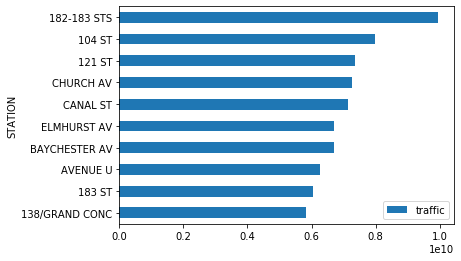

In [68]:
by_station = data.groupby('STATION').sum().sort_values(by=['traffic'], ascending=True).tail(10)
#traffic_by_station = pd.DataFrame(by_station)
#by_station_top_ten = traffic_by_station.tail(10)
by_station_top_ten.plot.barh(y='traffic');
plt.savefig('by_station_top_ten.png')

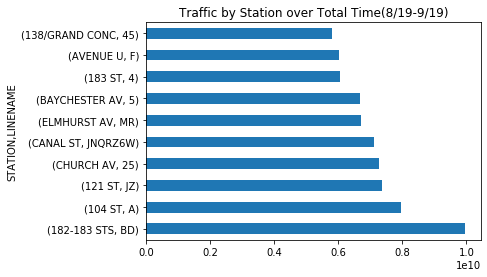

In [75]:
ax_by_station = data.groupby(["STATION", "LINENAME"])["traffic"].sum()\
.sort_values(ascending=False).head(10).plot(kind="barh", title="Traffic by Station over Total Time(8/19-9/19)")
#ax_by_station.set_xlabel("Total Weekly Entries")

NameError: name 'ax' is not defined

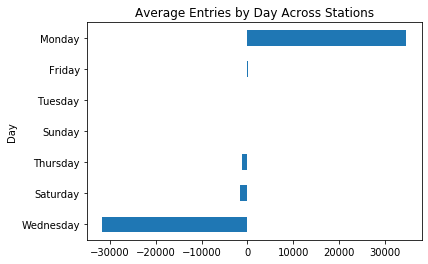

In [77]:
ax_by_station_by_day = data.groupby('Day').traffic.mean().sort_values().plot(kind='barh',title="Average Entries by Day Across Stations");
ax.set_xlabel("Daily Entries");

In [ ]:
df_per_station = df.turns.groupby(["STATION", "DATE"]).sum)
df_

In [81]:
np.random.randint(1,100)

22

In [ ]:
def max_product(numberString,adjacentDigits):
    for